<a href="https://colab.research.google.com/github/Silverz21/Ajuste-de-Parametros/blob/main/Proyecto_4_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.api._v2.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy 
import wandb
from wandb.keras import WandbCallback

In [ ]:
!pip install -q wandb

In [ ]:
!wandb login 413a0d41711512c3983464434786c77c6167d501

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


$$\textbf{Proyecto Redes Neuronales}$$



1.   Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo de $[-1,1]$. Graficar la solución en conjunto con la gráfica de la función.


(a) $3 sin(\pi x).$





Primero graficamos la función que queremos reproducir.

In [ ]:
x_t = np.linspace(-1, 1, 500)
y_t = 3 * np.sin(np.pi * x_t)

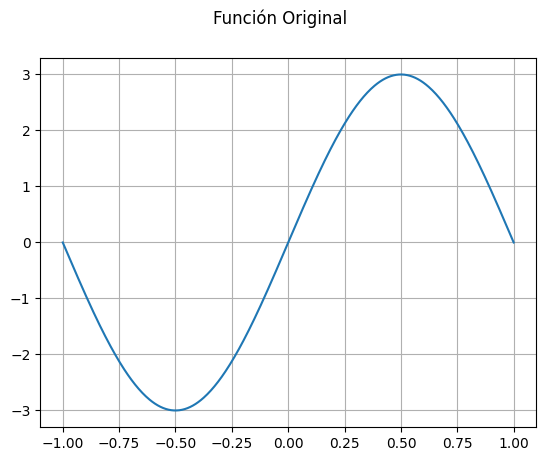

In [ ]:
plt.plot(x_t, y_t)
plt.suptitle('Función Original')
plt.grid(True)
plt.show()

Definimos el modelo y lo compilamos.

In [ ]:
modelo = keras.Sequential([
    layers.Dense(128, activation="relu",
                 input_shape=(1,)),
    layers.Dense(1)
])
modelo.compile(loss="mse", optimizer="adam")

Entrenamos el modelo.

In [ ]:
history = modelo.fit(x_t, y_t, batch_size=64,
                     epochs=500, verbose=1,
                     validation_data=(x_t, y_t))

Epoch 1/500
8/8 [==============================] - 1s 25ms/step - loss: 4.2519 - val_loss: 4.0320
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 3.8851 - val_loss: 3.6953
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 3.5581 - val_loss: 3.3913
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 3.2664 - val_loss: 3.1106
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 2.9993 - val_loss: 2.8493
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 2.7442 - val_loss: 2.6090
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 2.5120 - val_loss: 2.3862
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 2.2988 - val_loss: 2.1824
Epoch 9/500
8/8 [==============================] - 0s 8ms/step - loss: 2.1030 - val_loss: 2.0004
Epoch 10/500
8/8 [==============================] - 0s 8ms/step - loss: 1.9293 - val_loss: 1.8413
Epoch 11/500
8/8 [=========

Ahora evaluamos dicho modelo y comparamos su gráfica con la de la función original.

In [ ]:
x_test = np.linspace(-1, 1, 500)
y_test = 3 * np.sin(np.pi * x_t)
loss_a = modelo.evaluate(x_test, y_test, verbose=1)

16/16 [==============================] - 0s 1ms/step - loss: 1.6118e-04


16/16 [==============================] - 0s 1ms/step


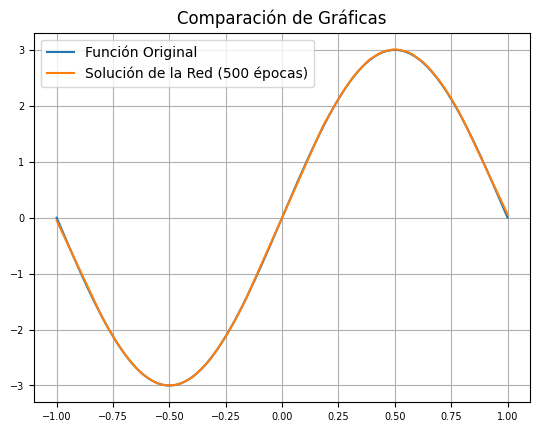

In [ ]:
plt.plot(x_t, y_t, label="Función Original")
plt.plot(x_test, modelo.predict(x_test), label="Solución de la Red (500 épocas)")
plt.legend()
plt.title('Comparación de Gráficas')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


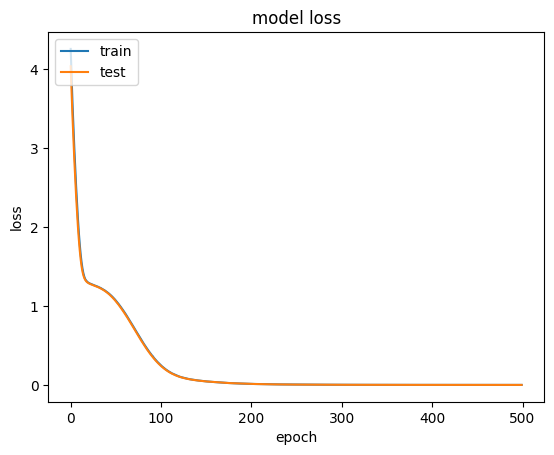

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
learning_rate_b = 0.01
epochs_b = 500
batch_size_b = 64

In [ ]:
wandb.init(project="Proyecto_4_RN")
wandb.config.learning_rate = 0.01
wandb.config.epochs = 500
wandb.config.batch_size = 64

(b) $1+2x+4x^3$


Teniendo el modelo ya definido solo sustituimos los datos de la función $(1+2x+4x^3)$ y graficamos los resultados.

In [ ]:
x_t = np.linspace(-1, 1, 500)
y_t = 1 + 2*x_t + 4*x_t*x_t*x_t

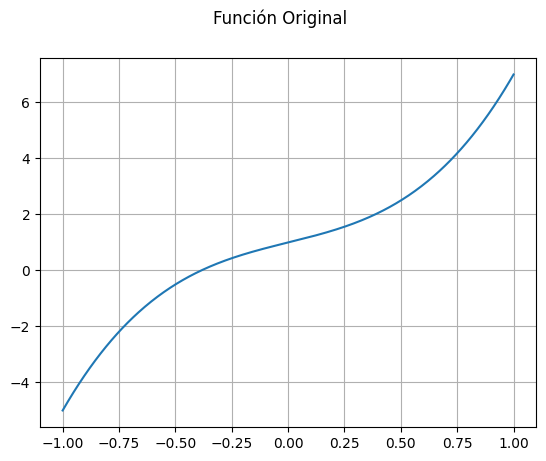

In [ ]:
plt.plot(x_t, y_t)
plt.suptitle('Función Original')
plt.grid(True)
plt.show()

In [ ]:
history = modelo.fit(x_t, y_t, batch_size=64,
                     epochs=500, verbose=1,
                     validation_data=(x_t, y_t))

Epoch 1/500
8/8 [==============================] - 0s 13ms/step - loss: 4.4808 - val_loss: 3.3289
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 2.8434 - val_loss: 2.2316
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 1.9651 - val_loss: 1.6427
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 1.5131 - val_loss: 1.2758
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 1.1802 - val_loss: 1.0291
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.9345 - val_loss: 0.8425
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7928 - val_loss: 0.6973
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6698 - val_loss: 0.6134
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5740 - val_loss: 0.5296
Epoch 10/500
8/8 [==============================] - 0s 9ms/step - loss: 0.5023 - val_loss: 0.4664
Epoch 11/500
8/8 [==========

In [ ]:
x_test = np.linspace(-1, 1, 500)
y_test = 1 + 2*x_t + 4*x_t*x_t*x_t
loss_a = modelo.evaluate(x_test, y_test, verbose=1)

16/16 [==============================] - 0s 3ms/step - loss: 0.0056


16/16 [==============================] - 0s 1ms/step


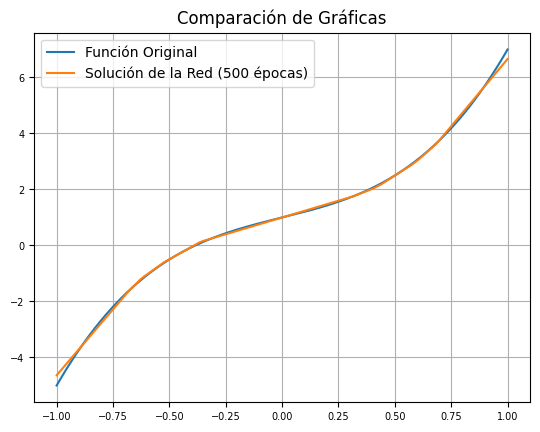

In [ ]:
plt.plot(x_t, y_t, label="Función Original")
plt.plot(x_test, modelo.predict(x_test), label="Solución de la Red (500 épocas)")
plt.legend()
plt.title('Comparación de Gráficas')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)
plt.show()

2. Elegir un problema de los siguientes y diseñar y entrenar una red neuronal con Keras.
